# Exploratory Analysis for All Space Missions from 1957<a name='back-to-top'></a>


## Background

Space has always been a fascinating topic for me. In elementary school I dressed up as Sally Ride for an autobiography project and my mom even purchased me a telescope to use in our backyard when I was younger. My interest in space and love for data analysis has driven me to conduct an exploratory analysis on this dataset, All Space Missions From 1957, from Kaggle [(data source)](https://www.kaggle.com/agirlcoding/all-space-missions-from-1957) using Python in Jupyter Notebook.

## Analysis Questions
                        
The analysis intends to answer the following questions (broken up by column name):

[**Company Name**](#analysis-on-comp)
   1. [How many companies have launched space missions since 1957?](#analysis-on-comp-q1)
   2. [Which 5 companies have launched the most space missions since 1957?](#analysis-on-comp-q2)
   3. [For the 5 companies from the previous question, how many missions have been successful? Failed?](#analysis-on-comp-q3)

[**Location**](#analysis-on-loc)
1. [Which 5 countries have launched the most space missions since 1957?](#analysis-on-loc-q1)
2. [From those 5 countries in Question 1, how many missions have been successful or failed?](#analysis-on-loc-q2)
3. [For space missions launched from the USA, which state has launched the most space missions?](#analysis-on-loc-q3)

[**Datum**](#analysis-on-datum)
1. [Which years had the most space missions (top 10)? 
And for the year with the most space missions, was there anything particularly special about this year?](#analysis-on-datum-q1) 
2. [Which year (since 1957) had the most successes? Most failures?](#analysis-on-datum-q2)
3. [For the top 5 countries from the Analysis on Location in Q1, what is the trend of space mission from 1957 to present?](#analysis-on-datum-q3) 
4. [What month do most space missions occur?](#analysis-on-datum-q4)
5. [What is the most "popular" hour to launch a space mission at?](#analysis-on-datum-q5)

[**Space Mission Cost**](#analysis-sm-cost)
  1. [Which company has the most expensive space missions on average?](#analysis-sm-cost-q1)
  2. [Which space mission was the most expensive of all time?](#analysis-sm-cost-q2)

[**Status Rocket**](#analysis-status-rocket)
 1. [How many countries currently have active rockets? And which countries are they?](#analysis-status-rocket-q1)
 2. [Are there any countries that do not have any active rockets?](#analysis-status-rocket-q2)
  
## Initial Setup

The analysis utilizing the following libraries:
- Numpy
- Pandas
- Matplotlib
- Seaborn
- Plotly
- Tabulate

The CSV file is read in as a dataframe called **sm** and two columns, "Unnamed: 0" and "Unnamed: 0.1" are dropped from the dataframe.

<p>
<p>
    
[**Back to Questions**](#back-to-q)

In [680]:
# Importing libraries
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import numpy as np

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

from tabulate import tabulate as tab

In [681]:
# read in csv as a dataframe
sm = pd.read_csv('Space_Corrected.csv')

# dropping the unnamed columns
sm.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1, inplace = True)

## Preliminary Dataframe Info

Obtaining the column names from the dataframe.

|Column Name   |Description   |
|:-------------|:-------------|
|Company Name   |Name of the company that deployed the space mission.   |
|Location   |Where the space mission launched from.   |
|Datum   |Date and time of launch.   |
|Detail   |Name of the rocket from the mission.   |
|Status Rocket   |Indicates whether the rocket is still active or retired.   |
|Rocket   |Cost of the mission in millions USD.   |
|Status Mission   |Indicates the result of the mission.   |

<p>
    
[**Back to Questions**](#back-to-q)

In [682]:
# getting general information about the csv file
sm.info()
sm.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company Name    4324 non-null   object
 1   Location        4324 non-null   object
 2   Datum           4324 non-null   object
 3   Detail          4324 non-null   object
 4   Status Rocket   4324 non-null   object
 5    Rocket         964 non-null    object
 6   Status Mission  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


Index(['Company Name', 'Location', 'Datum', 'Detail', 'Status Rocket',
       ' Rocket', 'Status Mission'],
      dtype='object')

[**Back to Top**](#back-to-top)

## Analysis on Companies <a name = "analysis-on-comp">
           
The following analysis intends to answer these questions:

   1. How many companies have launched space missions since 1957?
   2. Which 5 companies have launched the most space missions since 1957?
   3. For the 5 companies from the previous question, how many missions have been successful? Failed?
    
### 1. How many companies have launched space missions since 1957? <a name = "analysis-on-comp-q1">

56 companies have launched space missions since 1957.

In [683]:
sm['Company Name'].nunique()

56

### 2. Which 5 companies have launched the most space missions since 1957? <a name = "analysis-on-comp-q2">
The [RVSN USSR](https://en.wikipedia.org/wiki/Strategic_Rocket_Forces), [Arianespace](https://www.arianespace.com/), [CASC](http://www.casic.com/), [General Dynamics](https://www.gd.com/), and [NASA](https://www.nasa.gov/) have launched the most space missions since 1957 with RVSN USSR launching over 1,700!

In [684]:
table1 = pd.DataFrame(sm['Company Name'].value_counts().head())
print(tab(table1, headers = ['Company Name', 'Count'], tablefmt='fancy_grid'))

╒══════════════════╤═════════╕
│ Company Name     │   Count │
╞══════════════════╪═════════╡
│ RVSN USSR        │    1777 │
├──────────────────┼─────────┤
│ Arianespace      │     279 │
├──────────────────┼─────────┤
│ CASC             │     251 │
├──────────────────┼─────────┤
│ General Dynamics │     251 │
├──────────────────┼─────────┤
│ NASA             │     203 │
╘══════════════════╧═════════╛


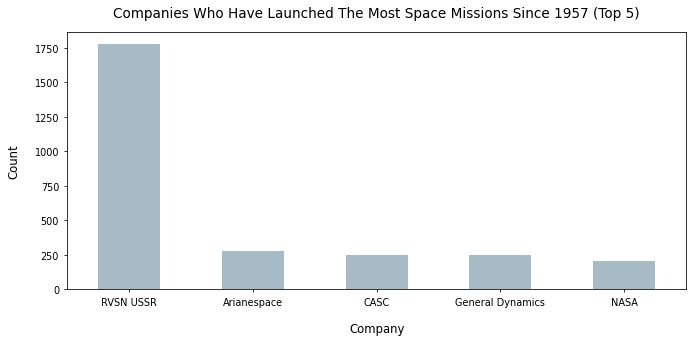

In [685]:
# figure size
plt.figure(figsize=(10,5), dpi = 70)

# generating plot
sm['Company Name'].value_counts().head().plot(kind = 'bar', color = '#a7bbc7')

# plot aesthetics (titles, labels, etc.)
plt.title('Companies Who Have Launched The Most Space Missions Since 1957 (Top 5)', size = 14, pad = 15)

plt.tick_params(axis = 'both', pad = 5)
plt.xlabel('Company', labelpad = 15, size = 12)
plt.xticks(rotation = 360)

plt.ylabel('Count', labelpad = 15, size = 12)

plt.tight_layout()
plt.savefig('Figures/most-missions.jpg', dpi = 100, transparent = False)
plt.show()

### 3. For the 5 companies with the most launched space missions, how many of those missions have succeeded or failed? <a name = "analysis-on-comp-q3">

- The company with the **highest number of successful** space missions is RVSN USSR (1,614 successful missions)
- The company with the **lowest number successful** space missions is NASA (186 successful missions)
- The company with the **highest number of failed** space missions is RVSN USSR (121 failed missions)
- The company with the **lowest number of failed** space missions is Arianespace (7 failed missions)

In [686]:
# creating a new dataframe with only the top 5 companiess
top_5 = ['RVSN USSR', 'Arianespace', 'General Dynamics', 'CASC', 'NASA']
top_5_filter = sm['Company Name'].isin(top_5)
sm5 = pd.DataFrame(sm[top_5_filter])

In [687]:
# success vs failure for top 5 companies
table2 = sm5.groupby(['Company Name','Status Mission'])['Company Name'].count().reset_index(name='Count')

In [688]:
# generating table
print(tab(table2.pivot(columns = ['Status Mission'], values = 'Count', index = 'Company Name').replace(np.nan, 0), 
          headers =['Status Mission\n\nCompany Name', 'Failure', 'Partial Failure', 'Prelaunch Failure', 'Success'],
         tablefmt="fancy_grid"))

╒══════════════════╤═══════════╤═══════════════════╤═════════════════════╤═══════════╕
│ Status Mission   │   Failure │   Partial Failure │   Prelaunch Failure │   Success │
│                  │           │                   │                     │           │
│ Company Name     │           │                   │                     │           │
╞══════════════════╪═══════════╪═══════════════════╪═════════════════════╪═══════════╡
│ Arianespace      │         7 │                 3 │                   0 │       269 │
├──────────────────┼───────────┼───────────────────┼─────────────────────┼───────────┤
│ CASC             │        14 │                 6 │                   0 │       231 │
├──────────────────┼───────────┼───────────────────┼─────────────────────┼───────────┤
│ General Dynamics │        37 │                11 │                   0 │       203 │
├──────────────────┼───────────┼───────────────────┼─────────────────────┼───────────┤
│ NASA             │        11 │           

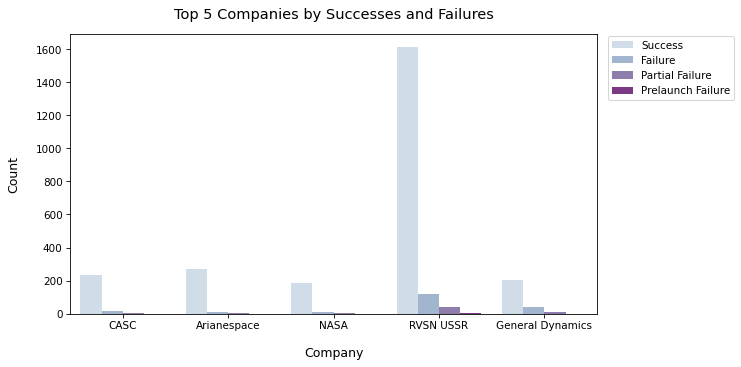

In [689]:
plt.figure(figsize = (10,5), dpi = 75)

sns.countplot(x = 'Company Name', data = sm5, hue = 'Status Mission', palette = 'BuPu')

plt.title('Top 5 Companies by Successes and Failures', size = 14, pad = 15)
plt.ylabel('Count', labelpad = 15, size = 12)
plt.xlabel('Company', labelpad = 15, size = 12)
plt.legend(bbox_to_anchor = (1.01,1.01))

plt.tight_layout()
plt.savefig('Figures/top-5-success-failures.jpg', dpi = 100, transparent = False)
plt.show()

[**Back to Top**](#back-to-top)

# Analysis on Location <a name = 'analysis-on-loc'>

The following analysis intends to answer the following questions:

1. Which 5 countries have launched the most space missions since 1957?
2. From those 5 countries in Question 1, how many missions have been successful or failed?
3. In respect to space missions launched from the USA, which state has launched the most space missions?

In [690]:
# Finding unique locations
sm['Location'].unique()

## Create new column called 'Country' ##

# countries - the choices
countries = ['USA', 'China', 'Kazakhstan', 
             'Japan', 'New Zealand', 'Israel', 
             'Russia', 'France', 'India', 'North Korea', 
             'Brazil','Australia', 'Kenya', 'Iran', 
             'Other (Sea)', 'South Korea', 'Spain']

# conditions - the condition list
conditions = [(sm['Location'].str.contains('USA')) | 
              sm['Location'].str.contains('New Mexico') | 
              sm['Location'].str.contains('LP-41, Kauai'),
                 (sm['Location'].str.contains('China')) | 
              (sm['Location'].str.contains('Tai Rui Barge, Yellow Sea')),
                 (sm['Location'].str.contains('Kazakhstan')),
                 (sm['Location'].str.contains('Japan')),
                 (sm['Location'].str.contains('New Zealand')),
                 (sm['Location'].str.contains('Israel')),
                 (sm['Location'].str.contains('Russia')),
                 (sm['Location'].str.contains('France')),
                 (sm['Location'].str.contains('India')),
                 (sm['Location'].str.contains('North Korea')),
                 (sm['Location'].str.contains('Brazil')),
                 (sm['Location'].str.contains('Australia')),
                 (sm['Location'].str.contains('Kenya')), 
              (sm['Location'].str.contains('Shahrud Missile Test Site')) |  
              (sm['Location'].str.contains('Imam Khomeini Spaceport')),
             (sm['Location'].str.contains('Kiritimati Launch Area')) | 
              (sm['Location'].str.contains(' Barents Sea Launch Area')),
             (sm['Location'].str.contains('South Korea')),
             (sm['Location'].str.contains('Stargazer, Base Aerea de'))]

# generating new column using numpy select (condition list, choice list, default value for NA values)
sm['Country'] = np.select(conditions, countries, default = 'NA')

## 1. Which 5 countries have launched the most space missions since 1957? <a name = "analysis-on-loc-q1">
Russia has launched the most space missions since 1957 (1,395). However, the USA is a close contender, launching 1,349 space missions since 1957.

In [691]:
# which 5 countries have launched the most space missions since 1957?
table3 = pd.DataFrame(sm.groupby('Country')['Country'].count().sort_values(ascending = False)).head()

# generating table
print(tab(table3, headers = ['Country', 'Count'], tablefmt="fancy_grid"))

╒════════════╤═════════╕
│ Country    │   Count │
╞════════════╪═════════╡
│ Russia     │    1395 │
├────────────┼─────────┤
│ USA        │    1349 │
├────────────┼─────────┤
│ Kazakhstan │     701 │
├────────────┼─────────┤
│ France     │     303 │
├────────────┼─────────┤
│ China      │     269 │
╘════════════╧═════════╛


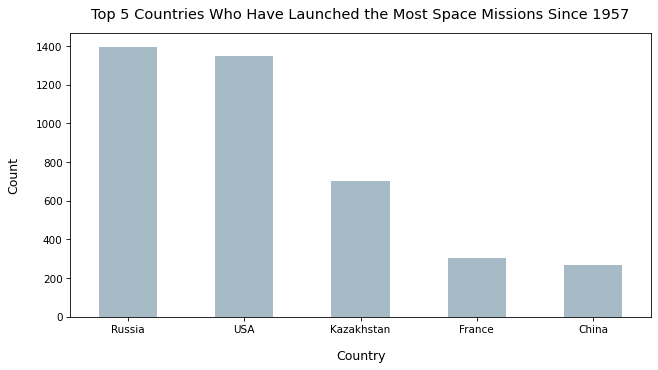

In [692]:
# creating bar plot
plt.figure(figsize = (10, 5), dpi = 75)

sm.groupby('Country')['Country'].count().sort_values(ascending = False).head().plot(kind = 'bar', color = '#a7bbc7' )

plt.title('Top 5 Countries Who Have Launched the Most Space Missions Since 1957', size = 14, pad = 15)
plt.xlabel('Country', size = 12, labelpad = 15)
plt.xticks(rotation = 360)

plt.ylabel('Count', size = 12, labelpad = 15)


plt.savefig('Figures/country-most-missions.jpg', dpi = 100, transparent = False)
plt.show()

In [693]:
# creating a new dataframe with just those 5 countries
smc5 = pd.DataFrame(sm[(sm['Country'] == 'Russia') | (sm['Country'] == 'USA') |
                       (sm['Country'] == 'Kazakhstan') | (sm['Country'] == 'France') |
                       (sm['Country'] == 'China')])

### 2. From those 5 countries in Question 1, how many missions have been successful or failed? <a name ="analysis-on-loc-q2">

- Russia has the **highest number of successful** space missions since 1957 (1,303 successful missions).
- China has the **lowest number of successful** space missions since 1957 (2,44 successful missions).
- The United States has the **highest number of failed** space missions since 1957 (129 failed missions).
- France has the **lowest number of failed** space missions since 1957 (13 failed missions).

In [694]:
table4 = pd.DataFrame(smc5.groupby(['Country', 'Status Mission'])['Country'].count().reset_index(name = 'Count'))
print(tab(table4.pivot(index = 'Country', 
                       columns = 'Status Mission', 
                       values = 'Count').replace(np.nan, 0), tablefmt='fancy_grid',
         headers = ['Status Mission\n\nCountry', 'Failure', 'Partial Failure', 'Prelaunch Failure', 'Success']))

╒══════════════════╤═══════════╤═══════════════════╤═════════════════════╤═══════════╕
│ Status Mission   │   Failure │   Partial Failure │   Prelaunch Failure │   Success │
│                  │           │                   │                     │           │
│ Country          │           │                   │                     │           │
╞══════════════════╪═══════════╪═══════════════════╪═════════════════════╪═══════════╡
│ China            │        19 │                 6 │                   0 │       244 │
├──────────────────┼───────────┼───────────────────┼─────────────────────┼───────────┤
│ France           │        13 │                 5 │                   0 │       285 │
├──────────────────┼───────────┼───────────────────┼─────────────────────┼───────────┤
│ Kazakhstan       │        72 │                20 │                   1 │       608 │
├──────────────────┼───────────┼───────────────────┼─────────────────────┼───────────┤
│ Russia           │        62 │           

In [695]:
# Targeting the USA, now making a new column called 'USA State'

# start by creating a new dataframe just with USA
usa_sm = pd.DataFrame(data = sm[sm['Country'] == 'USA'])
usa_sm.reset_index(inplace = True)

# find the unique States in the USA
usa_sm['Location'].unique()

# creation of new 'USA State' column
states = ['Florida', 'Texas', 'California', 'Hawaii', 'Alaska', 'Virginia', 'New Mexico', 'Marshall Islands']

state_cond = [(usa_sm['Location'].str.contains('Florida')),
              (usa_sm['Location'].str.contains('Texas')),
              (usa_sm['Location'].str.contains('California')),
              (usa_sm['Location'].str.contains('LP-41, Kauai')),
              (usa_sm['Location'].str.contains('Alaska')),
              (usa_sm['Location'].str.contains('Virginia')),
             (usa_sm['Location'].str.contains('Vertical Launch Area')),
             (usa_sm['Location'].str.contains('Ronald Reagan Ballistic'))]

usa_sm['USA State'] = np.select(state_cond, states, default = 'NA')

### 3. For the space missions launched from the USA, which state has launched the most space missions? <a name ="analysis-on-loc-q3">

The state of Florida has had 834 space missions launched. The only other state relatively close to that value is Califorinia with 453 space missions launched.

In [696]:
table5 = pd.DataFrame(usa_sm.groupby('USA State')['USA State'].count().sort_values(ascending = False))
print(tab(table5, tablefmt="fancy_grid", headers = ['State', 'Count']))

╒══════════════════╤═════════╕
│ State            │   Count │
╞══════════════════╪═════════╡
│ Florida          │     834 │
├──────────────────┼─────────┤
│ California       │     454 │
├──────────────────┼─────────┤
│ Virginia         │      31 │
├──────────────────┼─────────┤
│ Texas            │      13 │
├──────────────────┼─────────┤
│ Marshall Islands │       9 │
├──────────────────┼─────────┤
│ New Mexico       │       4 │
├──────────────────┼─────────┤
│ Alaska           │       3 │
├──────────────────┼─────────┤
│ Hawaii           │       1 │
╘══════════════════╧═════════╛


In [697]:
# generate map plot
data = dict(type = 'choropleth',
            locations = ['FL', 'TX', 'CA', 'HI', 'AK', 'VI', 'NM'],
            locationmode = 'USA-states',
            colorscale= 'PuBu',
            text= ['Florida', 'Texas', 'California', 'Hawaii', 'Alaska', 'Virginia'],
            z = usa_sm.groupby('USA State')['USA State'].count(),
            colorbar = {'title':'Count'})

layout = dict(geo = {'scope':'usa'})

choromap = go.Figure(data = [data],layout = layout)

# add title to plot
choromap.update_layout(title_text = "Space Mission Launches in the United States")

# export image
choromap.write_image('Figures/usa-space-launches.jpg', width = 700, height = 450, scale = 2)

# show image, although this will not be displayed in the notebook since it's HTML, so I used markdown to embed the image file
#iplot(choromap, show_link = True)

<img src = "https://raw.githubusercontent.com/julietwomack/SpaceMissions/main/Figures/usa-space-launches.jpg" width = "70%" style = "border: 1.5px solid black"></img>

<p>
    
[**Back to Questions**](#back-to-q)

## Analysis on Datum <a name ="analysis-on-datum">

The analysis intends to answer the following questions:
1. Which years had the most space missions (top 10)?
    - For the year with the most space missions, was there anything particularly special about this year?
2. Which year (since 1957) had the most successes? Most failures?
3. For the top 5 countries from the Analysis on Location in Q1, what is the trend of space mission from 1957 to present? 
4. What month do most space missions occur?
5. What is the most "popular" hour to launch a space mission at?

In [698]:
# converting "datum" column to datetime
sm['Datum'] = pd.to_datetime(sm['Datum'])

# creating new columns from Datum
sm['Hour'] = sm['Datum'].apply(lambda t: t.hour)
sm['Month'] = sm['Datum'].apply(lambda t: t.month)
sm['Year'] = sm['Datum'].apply(lambda t: t.year)

### 1. Which years had the most space missions (top 10)? <a name ="analysis-on-datum-q1">

1971 had the most space missions conducted (119 in total). In more modern times, 2018 had 117 space missions. Ovverall, the late 1970's appears to be a popular set of years for space travel as 1975 - 1977 are all in the top 5 for years with the most space missions.

#### For the year with the most space missions, was there anything particularly special about this year?

In 1971 three astronauts part of the [Soyuz 11 mission](https://en.wikipedia.org/wiki/Soyuz_11) were killed in space while reentering Earth's atmosphere. Those three men were the only human deaths to occur in space ([Wikipedia](https://en.wikipedia.org/wiki/1971_in_spaceflight)).

In [699]:
# what year had the most space missions - top 10?

# creating a new dataframe with the counts and outputting the table
table6 = pd.DataFrame(sm.groupby('Year')['Year'].count().sort_values(ascending = False).head(10))
print(tab(table6, tablefmt="fancy_grid", headers = ['Year', 'Count']))

╒════════╤═════════╕
│   Year │   Count │
╞════════╪═════════╡
│   1971 │     119 │
├────────┼─────────┤
│   2018 │     117 │
├────────┼─────────┤
│   1977 │     114 │
├────────┼─────────┤
│   1975 │     113 │
├────────┼─────────┤
│   1976 │     113 │
├────────┼─────────┤
│   2019 │     109 │
├────────┼─────────┤
│   1970 │     107 │
├────────┼─────────┤
│   1967 │     106 │
├────────┼─────────┤
│   1973 │     103 │
├────────┼─────────┤
│   1968 │     103 │
╘════════╧═════════╛


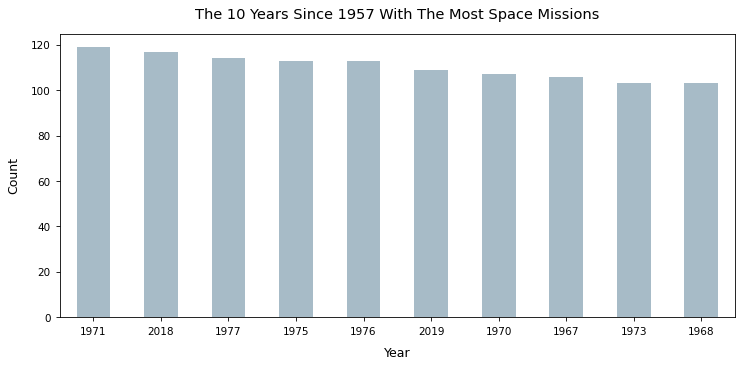

In [700]:
# generating the plot

plt.figure(figsize = (10, 5), dpi = 75)

sm.groupby('Year')['Year'].count().sort_values(ascending = False).head(10).plot(kind = 'bar', color = '#a7bbc7')

plt.xticks(rotation = 360)
plt.tick_params(axis = 'both', pad = 5)
plt.xlabel('Year', size = 12, labelpad = 10)
plt.ylabel('Count', size = 12, labelpad = 10)

plt.title('The 10 Years Since 1957 With The Most Space Missions', size = 14, pad = 15)
plt.tight_layout()
plt.savefig('Figures/top-10-years.jpg', dpi = 150, transparent = False)
plt.show()

### 2. Which year (since 1957) had the most successes? Most failures? <a name ="analysis-on-datum-q2">

2018 had the highest number of successful space missions (113 in total) and 1956 and 1960 had the highest number of failed space missions (20 each).

In [701]:
# which year (since 1957) had the most successes? Failures?

# getting counts for successes
table7 = pd.DataFrame(sm.loc[(sm['Status Mission']=='Success')].groupby(['Year', 
                                                   'Status Mission'])['Year'].count().sort_values(ascending = False).head(5).reset_index(name = 'Count'))

# generating table
print(tab(table7.pivot(index = 'Year', 
                       columns = 'Status Mission', 
                       values = 'Count').sort_values(by = 'Success', ascending = False), 
          tablefmt="fancy_grid",headers = ['Status Mission: Success\n\nYear', '\n\nCount']))

╒═══════════════════════════╤═════════╕
│   Status Mission: Success │         │
│                           │         │
│                      Year │   Count │
╞═══════════════════════════╪═════════╡
│                      2018 │     113 │
├───────────────────────────┼─────────┤
│                      1977 │     110 │
├───────────────────────────┼─────────┤
│                      1976 │     108 │
├───────────────────────────┼─────────┤
│                      1975 │     107 │
├───────────────────────────┼─────────┤
│                      1971 │     105 │
╘═══════════════════════════╧═════════╛


In [702]:
# getting counts for failures
table8 = pd.DataFrame(sm.loc[(sm['Status Mission']=='Failure')].groupby(['Year', 
                                                   'Status Mission'])['Year'].count().sort_values(ascending = False).head(5).reset_index(name = 'Count'))

print(tab(table8.pivot(index = 'Year',
                      columns = 'Status Mission',
                      values = 'Count').sort_values(by = 'Failure', ascending = False), tablefmt='fancy_grid',
         headers = ['Status Mission: Failure\n\nYear', '\n\nCount']))


╒═══════════════════════════╤═════════╕
│   Status Mission: Failure │         │
│                           │         │
│                      Year │   Count │
╞═══════════════════════════╪═════════╡
│                      1958 │      20 │
├───────────────────────────┼─────────┤
│                      1960 │      20 │
├───────────────────────────┼─────────┤
│                      1961 │      17 │
├───────────────────────────┼─────────┤
│                      1969 │      17 │
├───────────────────────────┼─────────┤
│                      1962 │      15 │
╘═══════════════════════════╧═════════╛


## 3. For the top 5 countries from the Analysis on Location in Q1, what is the trend for the number of space missions from 1957 to present? <a name ="analysis-on-datum-q3">

- Overall, Russia and the USA appear to be the "big players" in space exploration especially prior to 1990.
- The USA consistently launches the most space missions overtime.
- China rises as a contendor against the USA prior to 2020 in regard to number of space missions.
- Prior to the 2000's, Russia, Kazakhstan, and France launch around the same number of space missions per year.

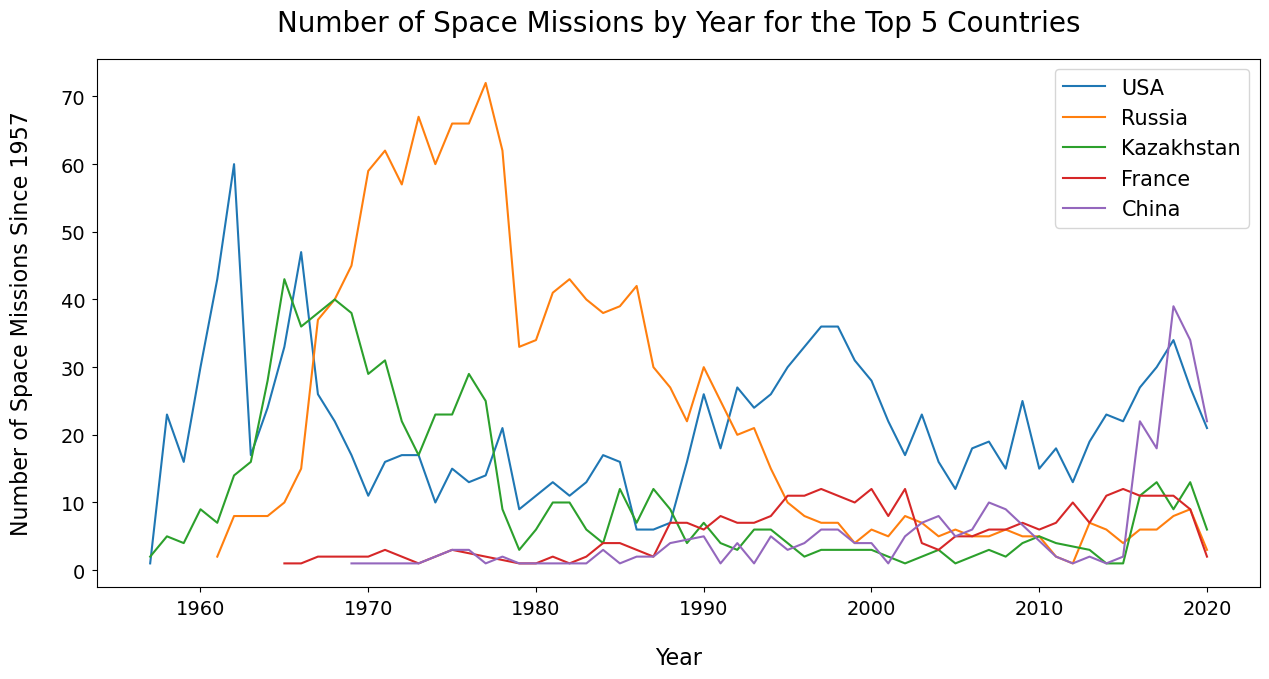

In [703]:
# create data frame for each top 5 country
USA = pd.DataFrame(sm.loc[sm['Country'] == 'USA'].groupby('Year').count()['Country'].reset_index(name = 'Count'))
RU = pd.DataFrame(sm.loc[sm['Country'] == 'Russia'].groupby('Year').count()['Country'].reset_index(name = 'Count'))
KZ = pd.DataFrame(sm.loc[sm['Country'] == 'Kazakhstan'].groupby('Year').count()['Country'].reset_index(name = 'Count'))
FR = pd.DataFrame(sm.loc[sm['Country'] == 'France'].groupby('Year').count()['Country'].reset_index(name = 'Count'))
CN = pd.DataFrame(sm.loc[sm['Country'] == 'China'].groupby('Year').count()['Country'].reset_index(name = 'Count'))

# generate the figure (line graph)
plt.figure(figsize = (15, 7), dpi = 100)

plt.plot(USA['Year'], USA['Count'], label = 'USA')
plt.plot(RU['Year'], RU['Count'], label = 'Russia')
plt.plot(KZ['Year'], KZ['Count'], label = 'Kazakhstan')
plt.plot(FR['Year'], FR['Count'], label = 'France')
plt.plot(CN['Year'], CN['Count'], label = 'China')

plt.title('Number of Space Missions by Year for the Top 5 Countries', size = 20, pad = 20)

plt.tick_params(axis = 'both', pad = 5)
plt.xlabel('Year', size = 16, labelpad = 20)
plt.xticks(size = 14)

plt.ylabel('Number of Space Missions Since 1957', size = 16, labelpad = 20)
plt.yticks(size = 14)

plt.legend(bbox_to_anchor =(1,1), prop = {'size': 15})
plt.savefig('Figures/count-by-country-year.jpg', dpi = 150, transparent = False)
plt.show()

## 4. What month do most space missions occur? <a name ="analysis-on-datum-q4">

December (450 space missions since 1957) and June (402 space missions since 1957) appear to be the most "popular" months for space missions.

In [704]:
# creating a dictionary for month and mapping it onto the month column
dmonth = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7:'Jul',
         8:'Aug', 9:'Sep', 10:'Oct',11:'Nov', 12:'Dec'}

sm ['Month'] = sm['Month'].map(dmonth)

In [705]:
table9 = pd.DataFrame(sm.groupby('Month')['Month'].count().sort_values(ascending = False))
print(tab(table9, headers = ['Month', 'Year'], tablefmt='fancy_grid'))

╒═════════╤════════╕
│ Month   │   Year │
╞═════════╪════════╡
│ Dec     │    450 │
├─────────┼────────┤
│ Jun     │    402 │
├─────────┼────────┤
│ Apr     │    383 │
├─────────┼────────┤
│ Oct     │    381 │
├─────────┼────────┤
│ Aug     │    373 │
├─────────┼────────┤
│ Sep     │    365 │
├─────────┼────────┤
│ Mar     │    353 │
├─────────┼────────┤
│ Jul     │    351 │
├─────────┼────────┤
│ Nov     │    336 │
├─────────┼────────┤
│ Feb     │    336 │
├─────────┼────────┤
│ May     │    326 │
├─────────┼────────┤
│ Jan     │    268 │
╘═════════╧════════╛


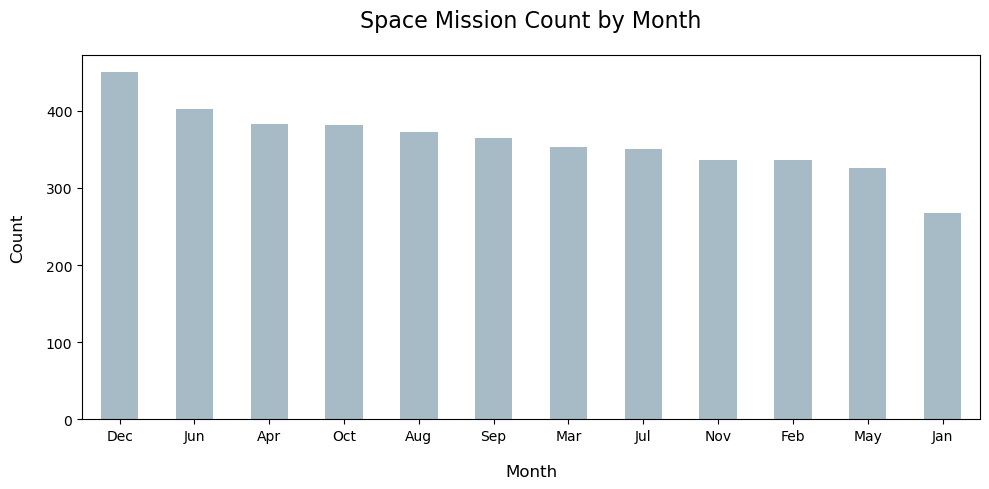

In [706]:
plt.figure(figsize = (10, 5), dpi = 100)

sm.groupby('Month')['Month'].count().sort_values(ascending = False).plot(kind='bar', color = '#a7bbc7')

plt.title('Space Mission Count by Month', size = 16, pad = 20)
plt.xticks(rotation = 360)
plt.xlabel('Month', size = 12, labelpad = 15)
plt.ylabel('Count', size = 12, labelpad = 15)

plt.savefig('Figures/space-mission-count-by-month.jpg', dpi = 100)
plt.tight_layout()

### What is the most "popular" hour to launch a space mission at? <a name ="analysis-on-datum-q5">

Midnight (00:00) is the most "popular" hour for space missions to launch at followed by 11 AM.

In [747]:
# most popular hour for space launches?
table12 = pd.DataFrame(sm.groupby('Hour')['Hour'].count().sort_values(ascending = False))
print(tab(table12, tablefmt="fancy_grid", headers = ['Hour', 'Count']))

╒════════╤═════════╕
│   Hour │   Count │
╞════════╪═════════╡
│      0 │     312 │
├────────┼─────────┤
│     11 │     235 │
├────────┼─────────┤
│      9 │     230 │
├────────┼─────────┤
│     12 │     228 │
├────────┼─────────┤
│     10 │     219 │
├────────┼─────────┤
│     22 │     203 │
├────────┼─────────┤
│     13 │     201 │
├────────┼─────────┤
│      8 │     194 │
├────────┼─────────┤
│     14 │     191 │
├────────┼─────────┤
│     21 │     179 │
├────────┼─────────┤
│     18 │     178 │
├────────┼─────────┤
│      7 │     176 │
├────────┼─────────┤
│     23 │     176 │
├────────┼─────────┤
│      1 │     164 │
├────────┼─────────┤
│     15 │     159 │
├────────┼─────────┤
│     20 │     153 │
├────────┼─────────┤
│      5 │     148 │
├────────┼─────────┤
│      6 │     147 │
├────────┼─────────┤
│      3 │     147 │
├────────┼─────────┤
│     16 │     146 │
├────────┼─────────┤
│     19 │     145 │
├────────┼─────────┤
│      4 │     140 │
├────────┼─────────┤
│     17 │   

[**Back to Top**](#back-to-top)

## Analysis on Rocket (Cost of Mission) <a name ="analysis-sm-cost">

The analysis intends to answer the following questions:
  1. Which company has the most expensive space missions on average?
  2. Which space mission was the most expensive of all time?

In [707]:
# renaming the column 'Rocket' to 'Cost of Mission' because it makes more sense contextually
sm.rename(columns = {' Rocket':'Cost of Mission'}, inplace = True)

In [708]:
# noticed some values of 'Cost of Mission' were strings instead of numerical values, 
# so I am changing those instances to be numerical. Also, checking the original source of the data, NextSpaceFlight.com,
# it appears the two missions that are said to be $5000.0 million USD are ACTUALLY $3000.0 millions USD, so I am making that
# correction.

sm.loc[sm['Cost of Mission'] == '5,000.0 ', 'Cost of Mission'] = 3000.0
sm.loc[sm['Cost of Mission'] == '1,160.0 ', 'Cost of Mission'] = 1160.0
sm['Cost of Mission'] = pd.to_numeric(sm['Cost of Mission'])

## 1. Which company has the most expensive space missions on average? <a name ="analysis-sm-cost-q1">

The RVSN USSR has the highest average cost for space missions. However, this may not be accurate because most values for 'Cost of Mission' are NA for RVSN USSR. There are only two recorded 'Cost of Mission' for RVSN USSR and both are 3,000 (in millions USD). The plot below indicates no other company has an average space mission cost as high as the RVSN USSR.

In [709]:
sm.groupby('Company Name').mean()['Cost of Mission'].dropna().sort_values(ascending = False).round(2).head(1)

Company Name
RVSN USSR    3000.0
Name: Cost of Mission, dtype: float64

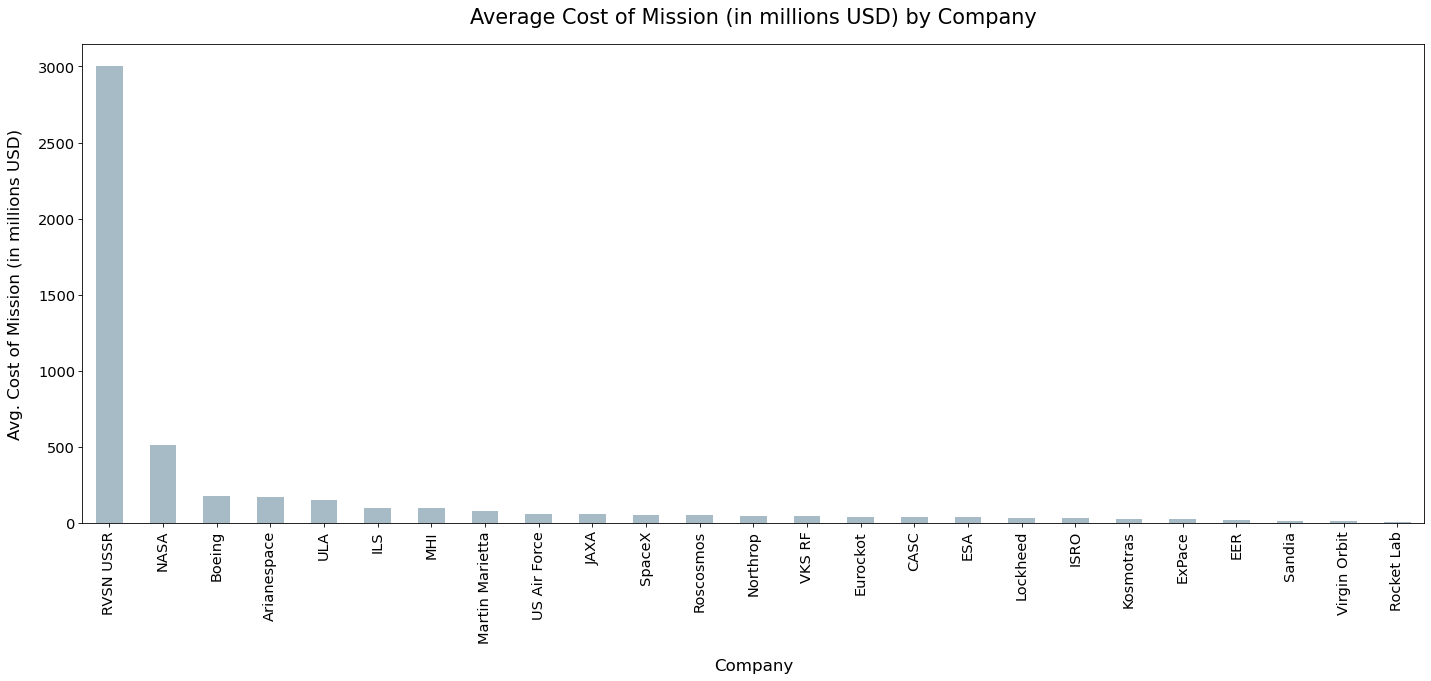

In [710]:
plt.figure(figsize = (20, 10), dpi = 75)
sm.groupby('Company Name').mean()['Cost of Mission'].dropna().sort_values(ascending = False).round(2).plot(kind = 'bar', 
                                                                                                           color = '#a7bbc7')
plt.title('Average Cost of Mission (in millions USD) by Company', size = 20, pad = 20)
plt.xlabel('Company', size = 16, labelpad = 15)
plt.ylabel('Avg. Cost of Mission (in millions USD)', size = 16, labelpad = 15)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.tight_layout(pad = 4)

## 2. Which space mission was the most expensive of all time? <a name ="analysis-sm-cost-q2">

The two most expensive space missions were in 1987 and 1988 from the RVSN USSR, the [Energiya/Polyus](https://nextspaceflight.com/launches/details/1119) and [Energiya/Buran](https://nextspaceflight.com/launches/details/1120), respectively.

In [711]:
# we know from the previous question there are two instances where a space mission cost 5000 (in millions USD)
sm[sm['Cost of Mission'] == 3000.00]

,Company Name,Location,Datum,Detail,Status Rocket,Cost of Mission,Status Mission,Country,Hour,Month,Year
1916,RVSN USSR,"Site 110/37, Baikonur Cosmodrome, Kazakhstan",1988-11-15 03:00:00+00:00,Energiya/Buran | Buran,StatusRetired,3000.0,Success,Kazakhstan,3,Nov,1988
2000,RVSN USSR,"Site 250, Baikonur Cosmodrome, Kazakhstan",1987-05-15 17:30:00+00:00,Energiya/Polyus | Polyus Space Station,StatusRetired,3000.0,Success,Kazakhstan,17,May,1987


[**Back to Top**](#back-to-top)

## Analysis on Status Rocket <a name = "analysis-status-rocket">
The analysis intends to answer the following questions:
  1. How many countries still have active rockets?
      - Which countries are they?
  2. Are there any countries that do not have any active rockets?

In [712]:
# cleaning up the values in the "Status Rocket column"
# it appears the only categories are 'Status Active' or 'Status Retired'
sm.groupby('Status Rocket')['Status Rocket'].count()

Status Rocket
StatusActive      790
StatusRetired    3534
Name: Status Rocket, dtype: int64

In [713]:
# changing 'StatusActive' to 'Active' and 'StatusRetired' to 'Retired'
sm.loc[sm['Status Rocket'] == 'StatusActive', 'Status Rocket'] = 'Active'
sm.loc[sm['Status Rocket'] == 'StatusRetired', 'Status Rocket'] = 'Retired'

### 1. How many countries currently have active rockets? And which countries are they? <a name = "analysis-status-rocket-q1">

There are 14 countries that have active rockets. They are listed in the table below.
- The table indicates that China (224 active rockets) and the USA (213 active rockets) have the most active rockets currently.
- Spain (2 active rockets) has the fewest number of active rockets.

In [714]:
# How many countries still have active rockets?
sm['Country'].loc[sm['Status Rocket'] == 'Active'].nunique()

14

In [715]:
# which countries still have active rockets?
table10 = pd.DataFrame(sm.loc[sm['Status Rocket'] == 'Active'].groupby('Country')['Country'].count().sort_values(ascending = False))
print(tab(table10, tablefmt = 'fancy_grid', headers = ['Country', 'Count']))

╒═════════════╤═════════╕
│ Country     │   Count │
╞═════════════╪═════════╡
│ China       │     224 │
├─────────────┼─────────┤
│ USA         │     213 │
├─────────────┼─────────┤
│ France      │     113 │
├─────────────┼─────────┤
│ India       │      50 │
├─────────────┼─────────┤
│ Kazakhstan  │      44 │
├─────────────┼─────────┤
│ Japan       │      38 │
├─────────────┼─────────┤
│ Russia      │      36 │
├─────────────┼─────────┤
│ Other (Sea) │      36 │
├─────────────┼─────────┤
│ New Zealand │      13 │
├─────────────┼─────────┤
│ Iran        │      10 │
├─────────────┼─────────┤
│ Israel      │       5 │
├─────────────┼─────────┤
│ North Korea │       3 │
├─────────────┼─────────┤
│ Brazil      │       3 │
├─────────────┼─────────┤
│ Spain       │       2 │
╘═════════════╧═════════╛


### 2. Are there any countries that do not have any active rockets? <a name = "analysis-status-rocket-q2">

Australia, South Korea, and Kenya are the only countries that **do not** currently have active rockets.

In [740]:
table11 = pd.DataFrame(sm.groupby(['Country', 'Status Rocket'])['Country'].count().reset_index(name = 'Count'))

print(tab(table11.pivot(index = 'Country', 
                        columns = 'Status Rocket', 
                        values = 'Count').fillna(0).sort_values('Active'), 
    tablefmt = "fancy_grid", headers = ['Status  Rocket: Active or Retired\n\nCountry','\n\nActive', '\n\nRetired']))

╒═════════════════════════════════════╤══════════╤═══════════╕
│ Status  Rocket: Active or Retired   │          │           │
│                                     │          │           │
│ Country                             │   Active │   Retired │
╞═════════════════════════════════════╪══════════╪═══════════╡
│ Australia                           │        0 │         6 │
├─────────────────────────────────────┼──────────┼───────────┤
│ South Korea                         │        0 │         3 │
├─────────────────────────────────────┼──────────┼───────────┤
│ Kenya                               │        0 │         9 │
├─────────────────────────────────────┼──────────┼───────────┤
│ Spain                               │        2 │         0 │
├─────────────────────────────────────┼──────────┼───────────┤
│ Brazil                              │        3 │         0 │
├─────────────────────────────────────┼──────────┼───────────┤
│ North Korea                         │        3 │     

[**Back to Top**](#back-to-top)